## EDA Student Performance


### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 3) Dataset Information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [14]:
df = pd.read_csv('StudentsPerformance.csv')

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.shape

(1000, 8)

**insight**

In this data set has 1000 rows and 8 columns

In [ ]:
## check missing value
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


**insight**

there are no missing value

In [ ]:
##check duplicates
df.duplicated().sum()

0

**insight**

there are no duplicate data

In [ ]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**insight**

there are 5 object and 3 numeric calumns

In [15]:
##chek the number of unique for each columns
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [24]:
##check statistics of dataset
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**insights**
- **From the above description of numerical data,all means are very close to each other-between 66 and 69**

- **All the set standerd deviation are close - between 14.6 - 15.19**

- **While there is a minimum of 0 for maths,other are having 17 and 10 values**

In [29]:
##check various categories present in the diffrent categorical columns
obj = df.select_dtypes(include="object").columns
num = df.select_dtypes(include="number").columns

In [28]:
obj

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [30]:
num

Index(['math score', 'reading score', 'writing score'], dtype='object')

In [40]:
## check unique categories of each coluns
for i in obj:
    print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [38]:
##check values counts of each object columns
for i in obj:
    print(df[i].value_counts())

gender
female    518
male      482
Name: count, dtype: int64
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64
lunch
standard        645
free/reduced    355
Name: count, dtype: int64
test preparation course
none         642
completed    358
Name: count, dtype: int64


In [42]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [57]:
### Aggregate the total score with mean
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df["average"] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


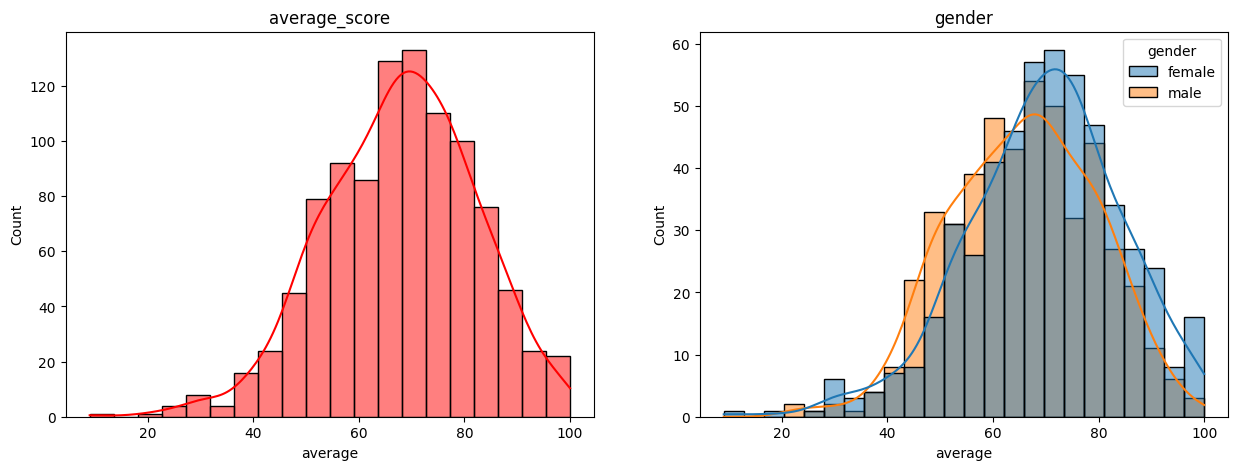

In [58]:
## Exploring more Visualization
fig, ax = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
plt.title("average_score")
sns.histplot(data=df,x="average",bins=20,kde=True,color="red")
plt.subplot(1,2,2)
plt.title("gender")
sns.histplot(data=df,x="average",kde=True,hue="gender")
plt.show()

**insight**

- Female student tend to perform well than male student


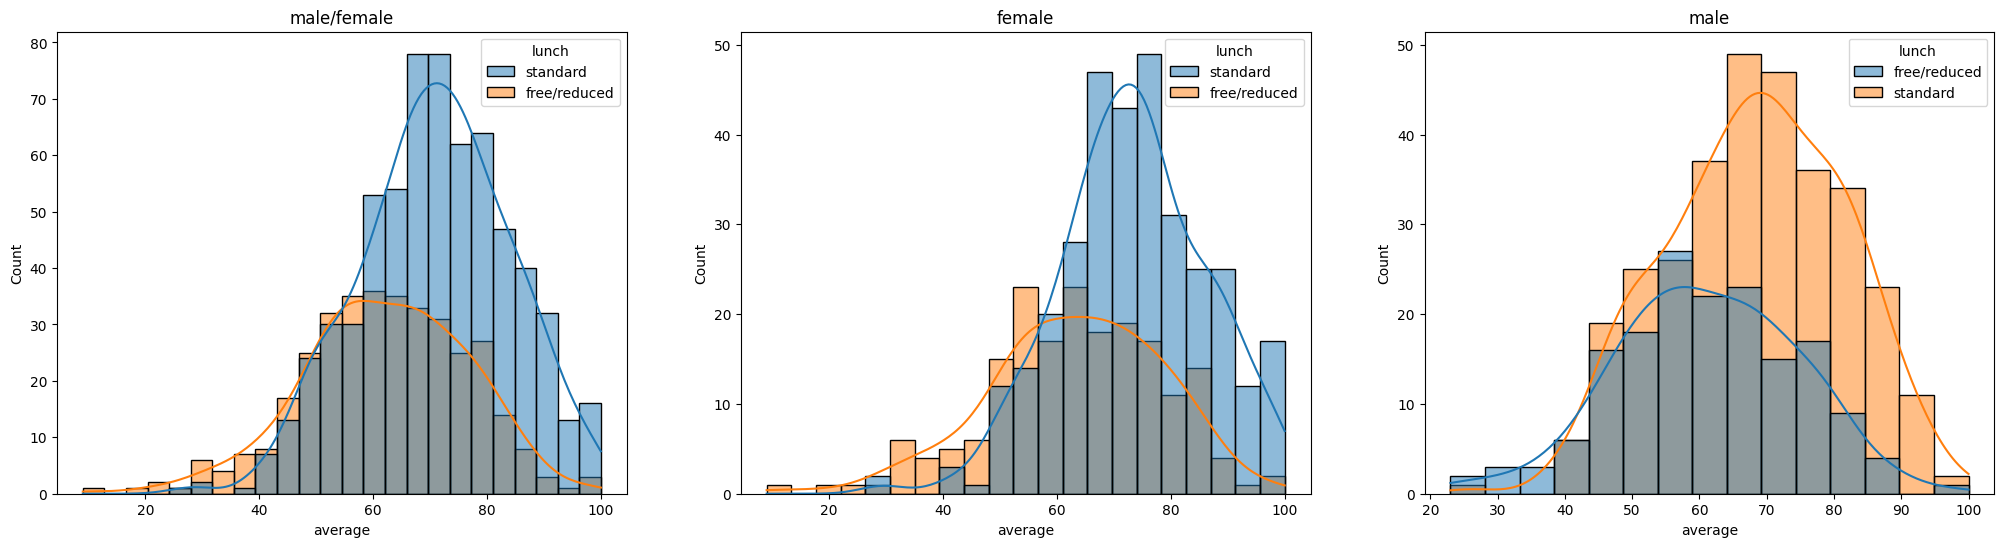

In [60]:
## checking average , from point of view of lunch

plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="average",kde=True,hue="lunch")
plt.title("male/female")
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue="lunch")
plt.title("female")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue="lunch")
plt.title("male")
plt.show()


**insight**

- **Standerd lunch helps students perform well in exame**

- **Standerd lunch helps perform welll in exame be it  male or female**

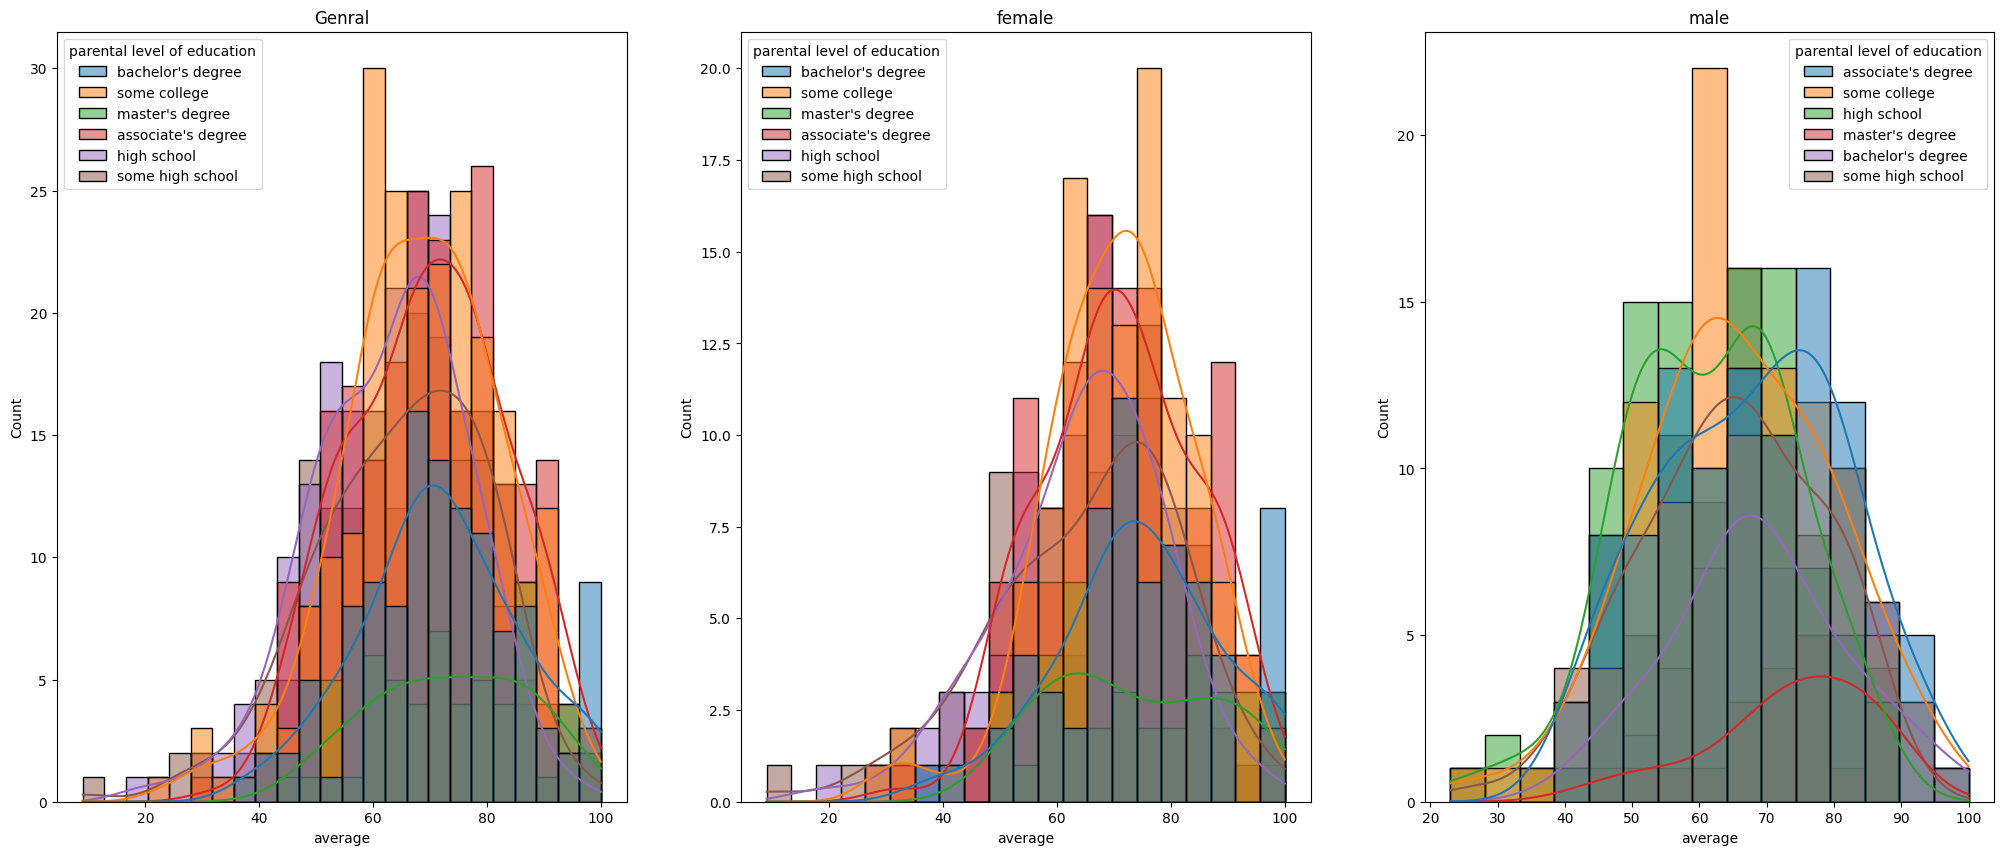

In [62]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df,x="average",kde=True,hue="parental level of education")
plt.title("Genral")
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue="parental level of education")
plt.title("female")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue="parental level of education")
plt.title("male")
plt.show()

**insigh**
- **In general parent's education don't help student perform well in exam**
- **2nd plot we can see ther is no efect of parent's education on female student**
- **3rd plot shows that parent's whoes education in of associate's degree or master degree their male chile tend to perform well in exame**

In [65]:
columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

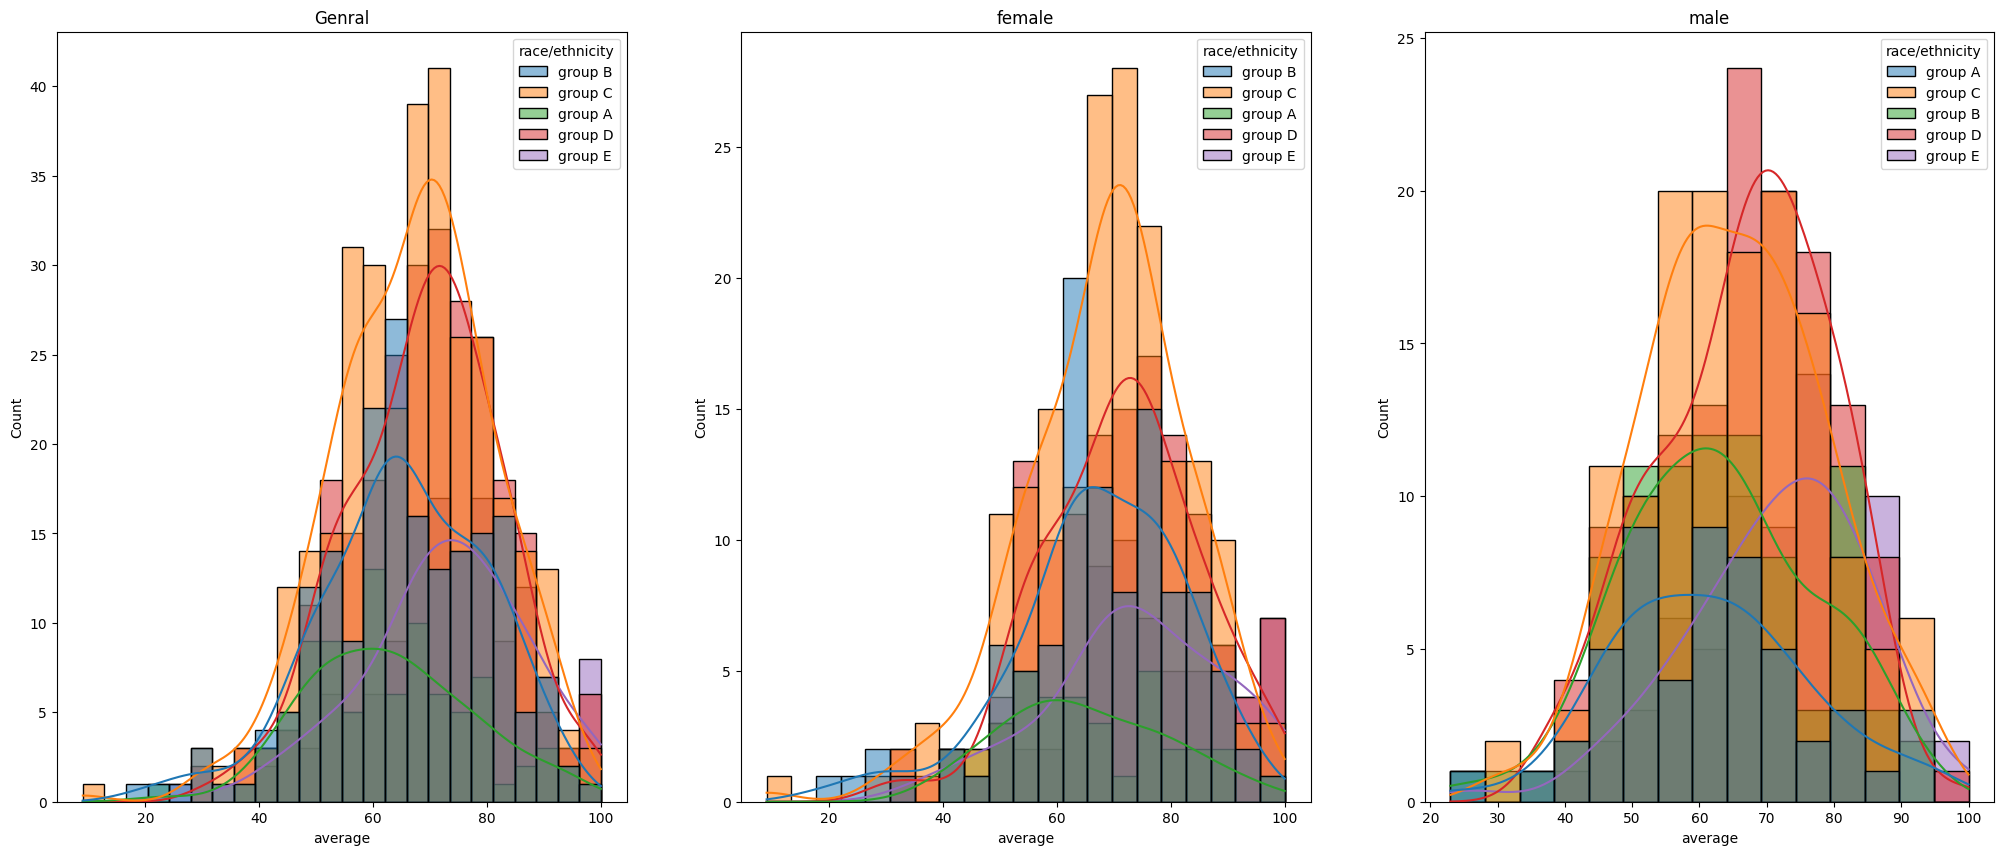

In [66]:
plt.subplots(1,3,figsize=(25,10))
plt.subplot(131)
sns.histplot(data=df,x="average",kde=True,hue="race/ethnicity")
plt.title("Genral")
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x="average",kde=True,hue="race/ethnicity")
plt.title("female")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x="average",kde=True,hue="race/ethnicity")
plt.title("male")
plt.show()

**insights**

- **Student of group a and B tends to perform poorly in exame**

- **Student of group A nad group b tends to perform poorly in exam irrespective of whether they are male or female**

<Axes: >

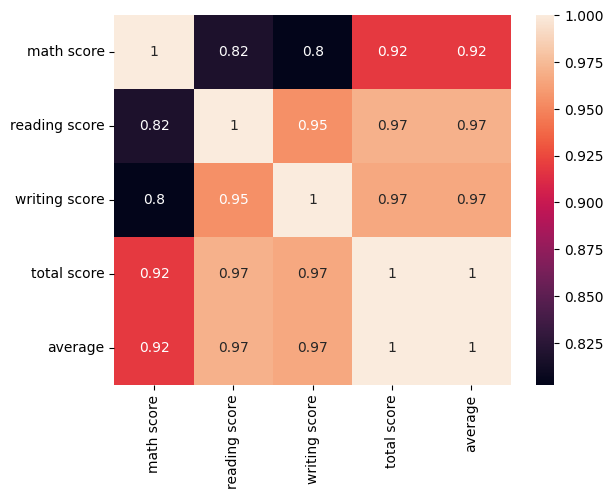

In [68]:
### analysis of numerical featue
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)